In [1]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

### 2E

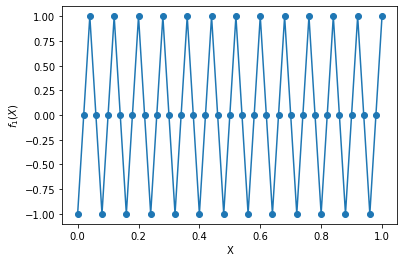

In [3]:
### make toy dataset, with interpolating zeros halfway between
N = 25
X = np.arange(0, (2 * N) + 1) / (2 * N)
Y = -np.zeros_like(X)
Y[0::4] = -1.
Y[2::4] = 1.

plt.plot(X, Y)
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("$f_1(X)$")
plt.show()

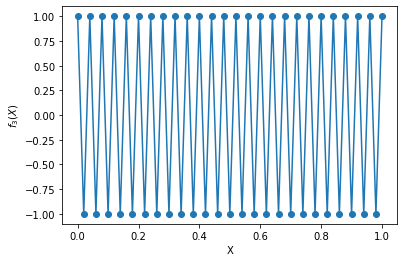

In [4]:
plt.plot(X, 2 * np.abs(Y) - 1)
plt.scatter(X, 2 * np.abs(Y) - 1)
plt.xlabel("X")
plt.ylabel("$f_3(X)$")
plt.show()

**Piecewise Linearity:**
As we see, $f_3$ remains piecewise linear -- we've simply folded the linear interpolation that was $f_1$ (also piecewise linear) on itself.

**Knot Count:**
The number of knots increases from $N + 1$ (for the original $0, \ldots, N$) to $(N + 1) + N$, with the additional zeros (originally part of the interpolation, but become knots on folding) added via $f_2$.

**Additional Commentary:**
Here, $f_3$ has not only let the $x_i$ retain their positions as knots in the linear interpolation; it's also introduced knot's at the original $f_1(x) = 0$ points, as the L1 norm makes these zeros "turnaround" points for the otherwise function -- i.e. (prior to scaling down) the L1 norm guarantees that all other transformed points, descend to, before turning around and beginning their ascent. In other words, the $2|x| - 1$ function makes all zeros knots, which effectively doubles the number of knots in the interpolation.

**Explanation**

Sentence 1: "*A Two-Hidden Layer ReLu Deepnet on x ∈ R with any coefficients whatsoever can still be
represented as a piecewise linear spline*." This follows from identical argumentation to that outlined in the $f_3$ piecewise linear question above: if you just keep adding and composing piecewise linear functions, you'll get a piecewise linear function at every step. Then, over the whole dataset, you'll have a "spline."

Sentence 2: "*If some coefficients of f1 or f2 are nonpositive, the spline
might involve more knots than would have been required in the positive-coefficient case*" This follows from the initial parts of problem 2 -- when you flip the sign, you may squash part of the output to zero, or you may unsquash part of the output from zero. This act of squashing/unsquashing will induce a kink, and hence another potential knot.

Sentence 3: "*Letting
$n_i$ denote the number of knots in $f_i$
, it might involve roughly as many as ($n_1$ + 1)·($n_2$ + 1) knots*". First, in $f_1$, we'll have approximately $n_1$ knots from the first layer: we get this by summing $n_1$ piecewise linear functions/relus. Then, for each $j=1, \ldots, n_2$, we examine
$$
c_j^2 \cdot relu(f_1(x) - b_j^2).
$$
This will take the $n_1$ knots from $f_1$, and potentially adjust each not (depending on $c_j^2, b_j^2$) to get $n_1$ "updated" knots that are specific to the $j$ index. Do this $n_2$ times for each $j$, and now you have up to $n_2$ sets of $n_1$ "j-specific" knots. Hence, it's $\mathcal{O}(n_1\cdot n_2)$ total knots.


####**3.)**
####**A.)**

In [5]:
import itertools
import math

plt.rcParams["figure.figsize"] = (7, 7)

U_fn = lambda i: np.array([
    math.cos(2 * math.pi * (i - 1) / 3),
    math.sin(2 * math.pi * (i - 1) / 3)
])

U = np.vstack([U_fn(1), U_fn(2), U_fn(3)])

X = np.vstack(
    [
     (i, j)
     for (i, j)
     in itertools.product(
         np.linspace(-3, 3, 250), 
         np.linspace(-3, 3, 250)
      )
    ]
)

def relu(x):
  x = x.copy()
  x[x < 0] = 0. 
  return x

def f1(x):
  x = x.copy()
  x[:, 0] -= 1
  x[:, 1] += 1
  return relu(x)

def f2(x):
  return relu(x @ (U.T) - 1.).sum(axis=1)

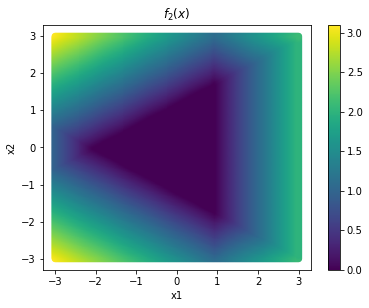

In [6]:
plt.rcParams["figure.figsize"] = (6, 4.5)

y2 = f2(X)

plt.scatter(X[:, 0], X[:, 1], c=y2)
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("$f_2(x)$")
plt.show()

### **B.)**

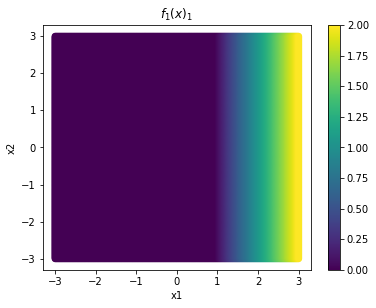

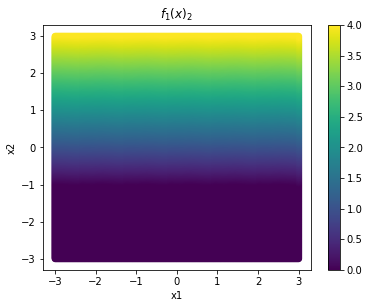

In [7]:
y1 = f1(X)

plt.scatter(X[:, 0], X[:, 1], c=y1[:, 0])
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("$f_1(x)_1$")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y1[:, 1])
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("$f_1(x)_2$")
plt.show()

###**3C.**

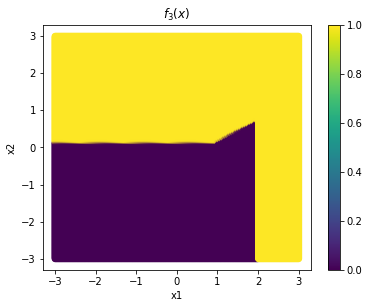

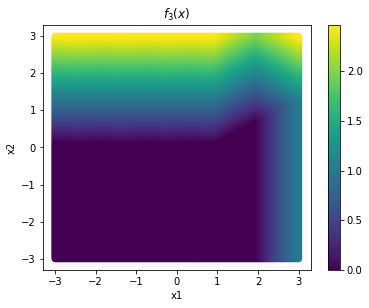

In [8]:
y3 = (f2(f1(X)) > 0 ).astype(int)

plt.scatter(X[:, 0], X[:, 1], c=y3)
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("$f_3(x)$")
plt.show()


y3 = f2(f1(X))

plt.scatter(X[:, 0], X[:, 1], c=y3)
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("$f_3(x)$")
plt.show()

###**D.)**
Given the simplicity of the ReLU, the cell decomposition is straightforward:

- The line $x_2 = -1$ splits $f_1(x)_2$ into two cells.

- The line $x_1 = 1$ splits $f_1(x)_1$ into two cells.

###**E.)**
Observe
\begin{align}
f_2(x)
&=
Relu(cos(0)x_1 + sin(0)x_2 - 1) \\
&\hspace{1.0cm} + 
Relu(cos(2\pi/3)x_1 + sin(2\pi/3)x_2 - 1)\\
&\hspace{1.0cm} + 
Relu(cos(4\pi/3)x_1 + sin(4\pi/3)x_2 - 1)\\
&=
Relu(x_1-1)\\
&\hspace{1.0cm} + 
Relu(-\frac{1}{2}x_1 + \frac{\sqrt{3}}{2}x_2 - 1)\\
&\hspace{1.0cm} + 
Relu(-\frac{1}{2}x_1 - \frac{\sqrt{3}}{2}x_2 - 1).
\end{align}
From this, we see that the cell boundaries (i.e. activation thresholds) must correspond to the lines

- $x_1 - 1 > 0 \implies x_1 = 1$

- $-\frac{1}{2}x_1 + \frac{\sqrt{3}}{2}x_2 - 1 > 0 \implies x_2 = \frac{x+2}{\sqrt{3}}$

- $-\frac{1}{2}x_1 - \frac{\sqrt{3}}{2}x_2 - 1 > 0 \implies x_2 = -\frac{x+2}{\sqrt{3}}$.

Hence the lines 
$$
\bigg\{x_1=-1, x_2 = \frac{x+2}{\sqrt{3}}, x_2 = -\frac{x+2}{\sqrt{3}}\bigg\}
$$
define the cell decomposition.

###**F.)**
As we are free to choose any subset/region $A$ on $\mathbb{R}^2$, consider $A = \{x: x_1 < 1, x_2 < -1\}$. By the properties of $f_1$, we shall always have for $x \in A$
$$
f_1(x) = [Relu(x_1 - 1), Relu(x_2 + 1)] = [0, 0].
$$
In turn, we are guaranteed 
$$f_2([0, 0]) = Relu(0 - 1) + Relu(0 - 1) + Relu(0 - 1) = 0$$, so for any $x\in A=\{x: x_1 < 1, x_2 < -1\}$, we will have 
$$
f_3(0) = 0 + \mathbf{0}^Tx.
$$


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!cp "drive/MyDrive/Colab Notebooks/STAT205_HW5_supp.ipynb" ./

In [11]:
!jupyter nbconvert --to PDF "STAT205_HW5_supp.ipynb"

[NbConvertApp] Converting notebook STAT205_HW5_supp.ipynb to PDF
[NbConvertApp] Support files will be in STAT205_HW5_supp_files/
[NbConvertApp] Making directory ./STAT205_HW5_supp_files
[NbConvertApp] Making directory ./STAT205_HW5_supp_files
[NbConvertApp] Making directory ./STAT205_HW5_supp_files
[NbConvertApp] Making directory ./STAT205_HW5_supp_files
[NbConvertApp] Making directory ./STAT205_HW5_supp_files
[NbConvertApp] Making directory ./STAT205_HW5_supp_files
[NbConvertApp] Making directory ./STAT205_HW5_supp_files
[NbConvertApp] Writing 59558 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 210533 bytes to STAT205_HW5_supp.pdf
